In [20]:
import pandas as pd
rest_df= pd.read_csv('rest_cleaned_data.csv')
rest_df.head()

,name,rating,reviews,lat,lng,address,types,neighbourhood,density,income,district
0,El Nacional Barcelona,4.4,37536.0,41.390583,2.168391,"Pg. de Gràcia, 24 Bis, L'Eixample, 08007 Barce...","spanish_restaurant, restaurant, point_of_inter...",el raval,429,11045.714286,ciutat vella
1,Cerveceria Catalana,4.4,22331.0,41.392325,2.160852,"Carrer de Mallorca, 236, L'Eixample, 08008 Bar...","spanish_restaurant, bar, restaurant, point_of_...",el barri gòtic,268,14032.444444,ciutat vella
2,Vinitus,4.5,15138.0,41.390026,2.164048,"Carrer del Consell de Cent, 333, L'Eixample, 0...","mediterranean_restaurant, bar, restaurant, poi...",la barceloneta,124,14063.454545,ciutat vella
3,Ciutat Comtal,4.4,20566.0,41.388854,2.166771,"Rambla de Catalunya, 18, Eixample, 08007 Barce...","spanish_restaurant, bar, restaurant, point_of_...","sant pere, santa caterina i la ribera",199,15395.615385,ciutat vella
4,La Flauta | Aribau,4.5,11859.0,41.386860,2.161064,"Carrer d'Aribau, 23, L'Eixample, 08011 Barcelo...","mediterranean_restaurant, spanish_restaurant, ...",el fort pienc,336,19193.300000,l'eixample


In [21]:
import folium
from folium.plugins import HeatMap

grouped = rest_df.groupby('neighbourhood').agg({
    'lat': 'mean',
    'lng': 'mean',
    'density': 'mean'
}).reset_index()

map_center = [grouped['lat'].mean(), grouped['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

heat_data = [[row['lat'], row['lng'], row['density']] for _, row in grouped.iterrows()]

HeatMap(heat_data, radius=25, blur=15, max_zoom=1).add_to(m)

for _, row in grouped.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        tooltip=row['neighbourhood'],
        color='gray',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)


m.save("neighbourhood_density_heatmap.html")
print("Heatmap saved as neighbourhood_density_heatmap.html")

Heatmap saved as neighbourhood_density_heatmap.html


In [22]:
#potential_areas = grouped[
#(grouped['income'] > grouped['income'].quantile(0.5)) &  # top 50% income
#(grouped['restaurant_count'] < grouped['restaurant_count'].quantile(0.5))  # below top 25% density]
#potential_areas
#potential_areas = grouped[(grouped['income'] > 20000) & (grouped['restaurant_count'] < 7)]
#potential_areas

In [27]:
grouped = rest_df.groupby('district').agg({'income': 'mean', 'density': 'mean', 'rating': 'mean', 'name': 'count'}).rename(columns={'name': 'restaurant_count'}).reset_index()
grouped

,district,income,density,rating,restaurant_count
0,ciutat vella,13634.307165,255.000000,4.425000,4
1,gràcia,19552.520617,319.333333,3.933333,6
2,horta-guinardo,16454.922881,164.000000,4.250000,10
3,l'eixample,20651.931431,380.166667,4.500000,6
4,les corts,25042.339683,162.666667,4.466667,3
5,nou barris,12536.548482,266.230769,4.230769,13
6,sant andreu,10686.850000,121.500000,4.400000,2
7,sants-montjuic,15716.780114,255.000000,4.442857,7
8,sarrià-sant gervasi,28539.385766,211.666667,4.466667,3


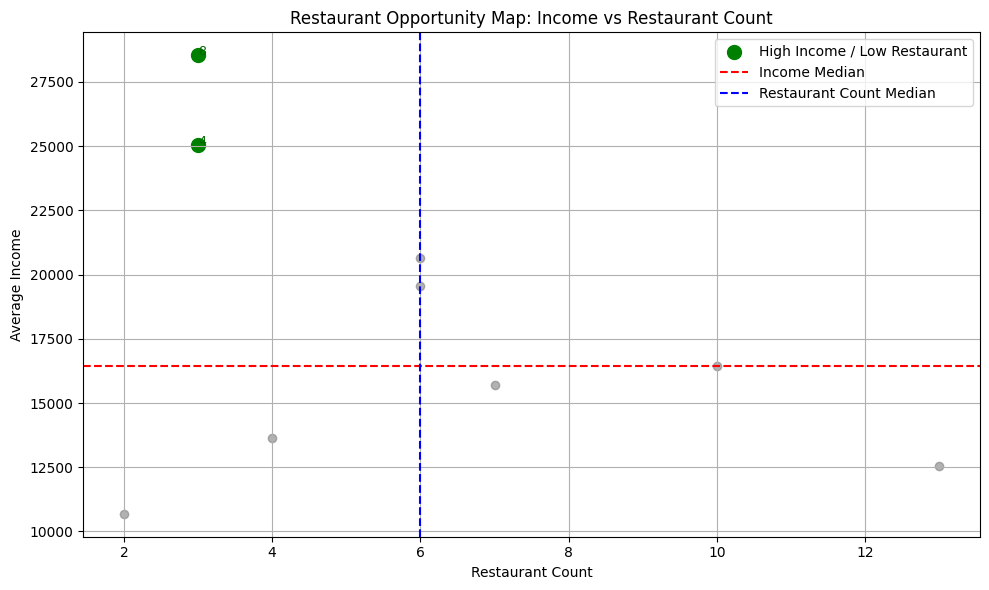

In [28]:
import matplotlib.pyplot as plt
import numpy as np

income_median = grouped['income'].median()
restaurant_median = grouped['restaurant_count'].median()

plt.figure(figsize=(10, 6))
plt.scatter(grouped['restaurant_count'], grouped['income'], c='grey', alpha=0.6)

highlight = grouped[
    (grouped['income'] > income_median) & 
    (grouped['restaurant_count'] < restaurant_median)]

plt.scatter(highlight['restaurant_count'], highlight['income'], 
            color='green', label='High Income / Low Restaurant', s=100)

plt.axhline(income_median, color='red', linestyle='--', label='Income Median')
plt.axvline(restaurant_median, color='blue', linestyle='--', label='Restaurant Count Median')

for i, row in highlight.iterrows():
    plt.annotate(row.name, (row['restaurant_count'], row['income']), fontsize=9, color='darkgreen')

plt.xlabel('Restaurant Count')
plt.ylabel('Average Income')
plt.title('Restaurant Opportunity Map: Income vs Restaurant Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:

all_df = pd.read_csv('combined_rest_and_hotel_count (1).csv')
all_df.head()

,Unnamed: 0,name,rating,reviews,lat,lng,address,types,neighbourhood,density,income,district,hotels_per_district
0,0,El Nacional Barcelona,4.4,37535.0,41.390583,2.168391,"Pg. de Gràcia, 24 Bis, L'Eixample, 08007 Barce...","spanish_restaurant, restaurant, point_of_inter...",el raval,429,11045.714286,ciutat vella,137
1,1,Cerveceria Catalana,4.4,22330.0,41.392325,2.160852,"Carrer de Mallorca, 236, L'Eixample, 08008 Bar...","spanish_restaurant, bar, restaurant, point_of_...",el barri gòtic,268,14032.444444,ciutat vella,137
2,2,Vinitus,4.5,15137.0,41.390026,2.164048,"Carrer del Consell de Cent, 333, L'Eixample, 0...","mediterranean_restaurant, bar, restaurant, poi...",la barceloneta,124,14063.454545,ciutat vella,137
3,3,Ciutat Comtal,4.4,20562.0,41.388854,2.166771,"Rambla de Catalunya, 18, Eixample, 08007 Barce...","spanish_restaurant, bar, restaurant, point_of_...","sant pere, santa caterina i la ribera",199,15395.615385,ciutat vella,137
4,4,La Flauta | Aribau,4.5,11859.0,41.386860,2.161064,"Carrer d'Aribau, 23, L'Eixample, 08011 Barcelo...","mediterranean_restaurant, spanish_restaurant, ...",el fort pienc,336,19193.300000,l'eixample,166


In [17]:
all_df = all_df.loc[:, ~all_df.columns.str.contains('^Unnamed')]
all_df.head(10)

,name,rating,reviews,lat,lng,address,types,neighbourhood,density,income,district,hotels_per_district
0,El Nacional Barcelona,4.4,37535.0,41.390583,2.168391,"Pg. de Gràcia, 24 Bis, L'Eixample, 08007 Barce...","spanish_restaurant, restaurant, point_of_inter...",el raval,429,11045.714286,ciutat vella,137
1,Cerveceria Catalana,4.4,22330.0,41.392325,2.160852,"Carrer de Mallorca, 236, L'Eixample, 08008 Bar...","spanish_restaurant, bar, restaurant, point_of_...",el barri gòtic,268,14032.444444,ciutat vella,137
2,Vinitus,4.5,15137.0,41.390026,2.164048,"Carrer del Consell de Cent, 333, L'Eixample, 0...","mediterranean_restaurant, bar, restaurant, poi...",la barceloneta,124,14063.454545,ciutat vella,137
3,Ciutat Comtal,4.4,20562.0,41.388854,2.166771,"Rambla de Catalunya, 18, Eixample, 08007 Barce...","spanish_restaurant, bar, restaurant, point_of_...","sant pere, santa caterina i la ribera",199,15395.615385,ciutat vella,137
4,La Flauta | Aribau,4.5,11859.0,41.386860,2.161064,"Carrer d'Aribau, 23, L'Eixample, 08011 Barcelo...","mediterranean_restaurant, spanish_restaurant, ...",el fort pienc,336,19193.300000,l'eixample,166
5,Honest Greens Plaça Catalunya,4.5,10272.0,41.387695,2.168050,"Rambla de Catalunya, 3, Eixample, 08007 Barcel...","mediterranean_restaurant, fast_food_restaurant...",la sagrada família,493,18661.088235,l'eixample,166
6,Colom Restaurant,4.7,26749.0,41.379853,2.176500,"Carrer dels Escudellers, 33, Ciutat Vella, 080...","mediterranean_restaurant, spanish_restaurant, ...",la dreta de l'eixample,211,23913.241379,l'eixample,166
7,Paradiso,4.3,6625.0,41.383677,2.183691,"Carrer de Rera Palau, 4, Ciutat Vella, 08003 B...","bar, sandwich_shop, restaurant, point_of_inter...",l'antiga esquerra de l'eixample,342,22555.192308,l'eixample,166
8,Hard Rock Cafè,4.4,24903.0,41.385894,2.170758,"Pl. de Catalunya, 21, Ciutat Vella, 08002 Barc...","american_restaurant, hamburger_restaurant, eve...",la nova esquerra de l'eixample,426,20893.100000,l'eixample,166
9,Cañete,4.6,7019.0,41.379153,2.173125,"Carrer de la Unió, 17, Ciutat Vella, 08001 Bar...","restaurant, spanish_restaurant, bar, point_of_...",sant antoni,473,18695.666667,l'eixample,166


In [13]:
district_density = all_df.groupby('district')['density'].mean().reset_index()
district_density.columns = ['district', 'avg_density']
district_density

,district,avg_density
0,ciutat vella,255.000000
1,gràcia,319.333333
2,horta-guinardo,164.000000
3,l'eixample,380.166667
4,les corts,162.666667
5,nou barris,266.230769
6,sant andreu,121.500000
7,sants-montjuic,255.000000
8,sarrià-sant gervasi,211.666667


In [14]:
district_density = all_df.groupby('district')['density'].mean().reset_index()
district_density.columns = ['district', 'avg_density']
df_with_density = all_df.merge(district_density, on='district')
df_sorted = df_with_density.sort_values(by='avg_density', ascending=False)
df_sorted[['name', 'district', 'density', 'avg_density', 'lat', 'lng']]

,name,district,density,avg_density,lat,lng
4,La Flauta | Aribau,l'eixample,336,380.166667,41.386860,2.161064
5,Honest Greens Plaça Catalunya,l'eixample,493,380.166667,41.387695,2.168050
9,Cañete,l'eixample,473,380.166667,41.379153,2.173125
8,Hard Rock Cafè,l'eixample,426,380.166667,41.385894,2.170758
7,Paradiso,l'eixample,342,380.166667,41.383677,2.183691
6,Colom Restaurant,l'eixample,211,380.166667,41.379853,2.176500
26,Pacha Barcelona,gràcia,375,319.333333,41.385744,2.197064
25,Opium Barcelona Restaurant and Club,gràcia,205,319.333333,41.385337,2.196753
27,L'Ovella Negra | Marina,gràcia,537,319.333333,41.395858,2.190242
28,Maná 75,gràcia,455,319.333333,41.368862,2.188269


In [15]:
import folium
from folium.plugins import HeatMap

grouped = rest_df.groupby('name').agg({
    'lat': 'mean',
    'lng': 'mean',
    'density': 'mean'
}).reset_index()

map_center = [grouped['lat'].mean(), grouped['lng'].mean()]
m = folium.Map(location=map_center, zoom_start=13)

heat_data = [[row['lat'], row['lng'], row['density']] for _, row in grouped.iterrows()]

HeatMap(heat_data, radius=25, blur=15, max_zoom=1).add_to(m)

for _, row in grouped.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=5,
        tooltip=row['name'],
        color='gray',
        fill=True,
        fill_opacity=0.2
    ).add_to(m)

m.save("restaurants_by_density_heatmap.html")
print("Heatmap saved as restaurant_density_heatmap.html")

Heatmap saved as restaurant_density_heatmap.html


In [79]:
all_df

,name,rating,reviews,lat,lng,address,types,neighbourhood,density,income,district,hotels_per_district
0,El Nacional Barcelona,4.4,37535.0,41.390583,2.168391,"Pg. de Gràcia, 24 Bis, L'Eixample, 08007 Barce...","spanish_restaurant, restaurant, point_of_inter...",el raval,429,11045.714286,ciutat vella,137
1,Cerveceria Catalana,4.4,22330.0,41.392325,2.160852,"Carrer de Mallorca, 236, L'Eixample, 08008 Bar...","spanish_restaurant, bar, restaurant, point_of_...",el barri gòtic,268,14032.444444,ciutat vella,137
2,Vinitus,4.5,15137.0,41.390026,2.164048,"Carrer del Consell de Cent, 333, L'Eixample, 0...","mediterranean_restaurant, bar, restaurant, poi...",la barceloneta,124,14063.454545,ciutat vella,137
3,Ciutat Comtal,4.4,20562.0,41.388854,2.166771,"Rambla de Catalunya, 18, Eixample, 08007 Barce...","spanish_restaurant, bar, restaurant, point_of_...","sant pere, santa caterina i la ribera",199,15395.615385,ciutat vella,137
4,La Flauta | Aribau,4.5,11859.0,41.386860,2.161064,"Carrer d'Aribau, 23, L'Eixample, 08011 Barcelo...","mediterranean_restaurant, spanish_restaurant, ...",el fort pienc,336,19193.300000,l'eixample,166
5,Honest Greens Plaça Catalunya,4.5,10272.0,41.387695,2.168050,"Rambla de Catalunya, 3, Eixample, 08007 Barcel...","mediterranean_restaurant, fast_food_restaurant...",la sagrada família,493,18661.088235,l'eixample,166
6,Colom Restaurant,4.7,26749.0,41.379853,2.176500,"Carrer dels Escudellers, 33, Ciutat Vella, 080...","mediterranean_restaurant, spanish_restaurant, ...",la dreta de l'eixample,211,23913.241379,l'eixample,166
7,Paradiso,4.3,6625.0,41.383677,2.183691,"Carrer de Rera Palau, 4, Ciutat Vella, 08003 B...","bar, sandwich_shop, restaurant, point_of_inter...",l'antiga esquerra de l'eixample,342,22555.192308,l'eixample,166
8,Hard Rock Cafè,4.4,24903.0,41.385894,2.170758,"Pl. de Catalunya, 21, Ciutat Vella, 08002 Barc...","american_restaurant, hamburger_restaurant, eve...",la nova esquerra de l'eixample,426,20893.100000,l'eixample,166
9,Cañete,4.6,7019.0,41.379153,2.173125,"Carrer de la Unió, 17, Ciutat Vella, 08001 Bar...","restaurant, spanish_restaurant, bar, point_of_...",sant antoni,473,18695.666667,l'eixample,166


In [16]:
filtered_df = all_df.groupby('district')[['income', 'density', 'hotels_per_district']].mean().reset_index()
filtered_df

,district,income,density,hotels_per_district
0,ciutat vella,13634.307165,255.000000,137.0
1,gràcia,19552.520617,319.333333,9.0
2,horta-guinardo,16454.922881,164.000000,8.0
3,l'eixample,20651.931431,380.166667,166.0
4,les corts,25042.339683,162.666667,20.0
5,nou barris,12536.548482,266.230769,1.0
6,sant andreu,10686.850000,121.500000,2.0
7,sants-montjuic,15716.780114,255.000000,25.0
8,sarrià-sant gervasi,28539.385766,211.666667,36.0


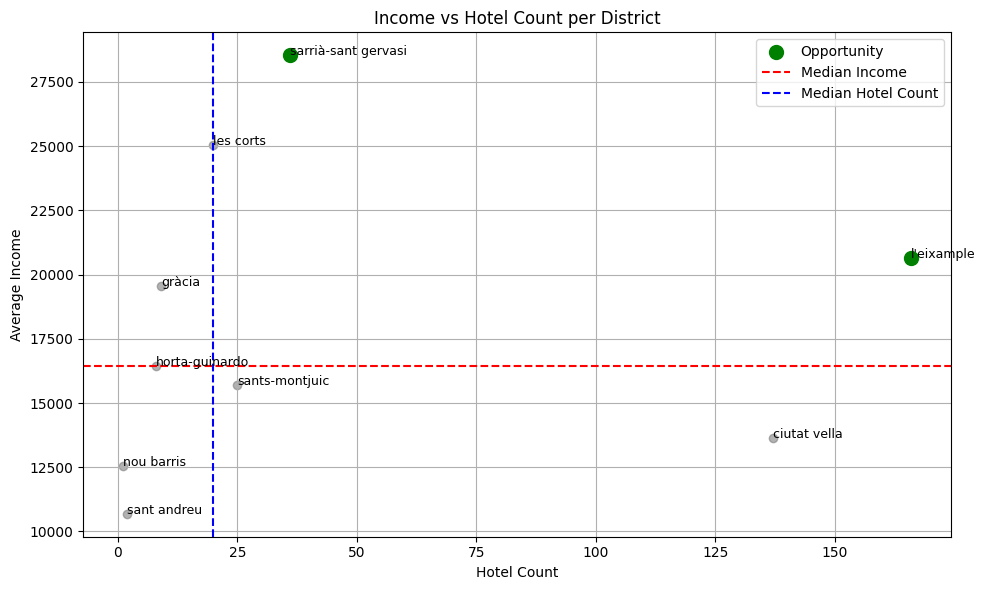

In [93]:
import matplotlib.pyplot as plt

income_median = filtered_df['income'].median()
hotel_median = filtered_df['hotels_per_district'].median()

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['hotels_per_district'], filtered_df['income'], color='gray', alpha=0.6)

highlight = filtered_df[
    (filtered_df['income'] > income_median) & 
    (filtered_df['hotels_per_district'] > hotel_median)
]
plt.scatter(highlight['hotels_per_district'], highlight['income'], color='green', label='Opportunity', s=100)

for _, row in filtered_df.iterrows():
    plt.annotate(row['district'], (row['hotels_per_district'], row['income']), fontsize=9)

plt.axhline(income_median, color='red', linestyle='--', label='Median Income')
plt.axvline(hotel_median, color='blue', linestyle='--', label='Median Hotel Count')

plt.xlabel('Hotel Count')
plt.ylabel('Average Income')
plt.title('Income vs Hotel Count per District')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [32]:
grouped

,district,income,density,rating,restaurant_count,density_percentage
0,ciutat vella,13634.307165,255.000000,4.425000,4,11.94
1,gràcia,19552.520617,319.333333,3.933333,6,14.95
2,horta-guinardo,16454.922881,164.000000,4.250000,10,7.68
3,l'eixample,20651.931431,380.166667,4.500000,6,17.80
4,les corts,25042.339683,162.666667,4.466667,3,7.62
5,nou barris,12536.548482,266.230769,4.230769,13,12.47
6,sant andreu,10686.850000,121.500000,4.400000,2,5.69
7,sants-montjuic,15716.780114,255.000000,4.442857,7,11.94
8,sarrià-sant gervasi,28539.385766,211.666667,4.466667,3,9.91


In [33]:
total_density = grouped["density"].sum()

grouped["density_percentage"] = (grouped["density"] / total_density) * 100

grouped["density_percentage"] = grouped["density_percentage"].round(2)

grouped_sorted = grouped.sort_values(by="density_percentage", ascending=False)

print(grouped[["district", "density", "density_percentage"]])

              district     density  density_percentage
0         ciutat vella  255.000000               11.94
1               gràcia  319.333333               14.95
2       horta-guinardo  164.000000                7.68
3           l'eixample  380.166667               17.80
4            les corts  162.666667                7.62
5           nou barris  266.230769               12.47
6          sant andreu  121.500000                5.69
7       sants-montjuic  255.000000               11.94
8  sarrià-sant gervasi  211.666667                9.91
